<a href="https://colab.research.google.com/github/MatchLab-Imperial/deep-learning-course/blob/master/2020_01_part3_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Starting with Keras**

Keras is a high-level Deep Learning API  written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. In other words, Keras is especially good for beginners, it is modular, minimalist and it is easy to get a neural network up and running in no time. 

Based on [this tutorial](https://elitedatascience.com/keras-tutorial-deep-learning-in-python). The following code is just a brief introduction to Keras, refer to [Keras documentation](https://keras.io/) to learn more about it.

## Importing Libraries and Modules

Google Colab already has everything you need installed. We highly recommend to use Colab for this tutorial, however, if you want to use your our environment, you will need to set up a Python environment and install Keras on it. 

You can find multiple guides that will help you with the task of installing Keras on your machine. Here are some examples for [Windows](http://inmachineswetrust.com/posts/deep-learning-setup/) or [Ubuntu](https://medium.com/@naomi.fridman/install-conda-tensorflow-gpu-and-keras-on-ubuntu-18-04-1b403e740e25).

We will import numpy and set a seed for the pseudorandom number generator. This seed is important for reproducibility, since different initializations might lead to varying results.

In [0]:
import numpy as np
np.random.seed(123)  # for reproducibility

Now we are ready to start importing some of Keras' modules.

First, we will import the `Sequential` module from Keras. A `Sequential` module is a stack of neural network layers, and it will be used when creating our first feed-forward network.


In [0]:
from keras.models import Sequential

As mentioned before, Keras is a wrapper that allows us to use either Theano or TensorFlow as backend. It is easy to switch between them if required. However, newer versions of Keras will focus on the TensorFlow backend, dropping support for the rest of backends. In this tutorial, we will use the TensorFlow backend. Same as with the numpy pseudorandom number generator, we also fix Keras pseudorandom number generator for reproducibility.

In [0]:
from tensorflow import set_random_seed
set_random_seed(123)

Next, we will import two of the core layers used to build a network on Keras: [`Dense`](https://keras.io/layers/core/#dense) and [`Activation`](https://keras.io/layers/core/#activation). In short, `Dense` defines a fully-connected network where all the neurons are connected to all of the elements of the input data and `Activation` defines a non-linear function applied to the network. We will explain more about the available layers in the next tutorials.

In [0]:
from keras.layers import Dense, Activation

Also, we import some utils, that will help us later with visualisation and transforming the dataset.

In [0]:
from keras.utils import np_utils
import matplotlib.pyplot as plt

## Loading datasets from Keras

Besides the modules to build our neural networks, Keras library also contains [standard datasets](https://keras.io/datasets/). The fact that those datasets are inside Keras is handy and can save us a lot of time when learning how to create our first neural network. 

To show this, we import the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, which contains binary images of handwritten images, and load it.

In [0]:
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now we have on `X_train` and `X_test` variables the training/test partitions provided by Keras,  and on `y_train` and `y_test` their corresponding labels.

We can now look into the shape of the data, and visualise some data examples:




Image shape: (28, 28)
Total number of training samples: 60000
Total number of test samples: 10000


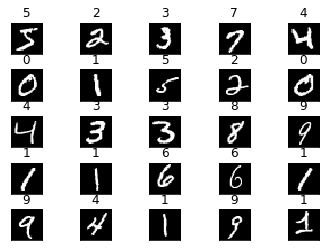

In [53]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

N=5
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

Therefore, we have 60000 training samples and 10000 test samples, where each image has a shape of $28\times 28$ pixels. Visualizing the data before starting to deploy any algorithms is always a good idea: it is a quick sanity check that can prevent easily avoidable mistakes.

## Preprocessing Keras datasets

In this first example, we will train a simple model to classify the digits on MNIST dataset. As will be introduced in the lectures, convolutional layers are usually employed to classify images. However, for the moment we use only `Dense` layers, so we have to reshape the images to have a single dimension. Therefore, the same network could be used for any 1D data. We will see on following weeks that when using Convolutional Neural Networks (CNNs) we must define a 3D shape for images (depth, width, height). CNNs usually have higher performance compared to models with only `Dense` layers when applied to 2D data.

Let's flatten the data now.

In [54]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('New X_train shape: {0}'.format(X_train_flatten.shape))

New X_train shape: (60000, 784)


A standard practise is to normalise the dataset to the range $[0, 1]$.

In [0]:
X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255

To train the model we also process the labels. The `y_train` and `y_test` labels are represented as a single array with the class values as integer. 




For the loss we will use for training, we need to transform those values to a [one-hot encoded vector](https://en.wikipedia.org/wiki/One-hot).

In [56]:
Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

New Y_train shape: (60000, 10)


To see the difference in representation, let's print the first element of `y_train` and `Y_train_class`.

In [57]:
print(y_train[0], Y_train_class[0])

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))


## Model Architecture

Defining model architectures is a critical step when trying to solve a machine learning problem. In this tutorial, we will understand how models can be built in Keras, starting from a simpler model and then using a more complex example. Here is a list of [implemented models for specific datasets](https://github.com/keras-team/keras/tree/master/examples) which can be a useful reference. 

First, we need to declare a `Sequential` module. As mentioned, a `Sequential` module is a linear stack of neural network layers. We, therefore, can create a mode  by passing a list of layer instances to the `Sequential` module, 

In [0]:
model = Sequential([
    Dense(10, input_shape=(784,)),
    Activation('softmax'),
])

Keras also allows us to simply add layers via the `.add()` method:

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

We now have a simple model ready. However, the model needs to know what input shape is going to receive. For this reason, the first layer in a Sequential model (and only the first, because the following layers can do automatic shape inference) needs to receive information about its input shape. As seen previously, after the flatten operation our images have a shape of 784. If we were using directly images, the input shape would have been (28, 28, 1), which corresponds to the (width, height, depth) of each digit image. The formatting (width, height, depth) is called `channels_last`, which is used by default in Keras, however Keras also accepts the format (depth, width, height), which is called `channels_first`. You can either pass the argument `data_format` when defining a layer or setting your preferred data format as default by using the code given [here](https://keras.rstudio.com/reference/k_image_data_format.html). 

We now can check the model shape output:

In [60]:
print(model.output_shape)

(None, 10)


The dense layer used in our model is a fully connected layer, where the first parameter is the output size of the layer. The final layer has an output size of 10, corresponding to the 10 classes of digits. Keras automatically handles the connections between layers. In this case, the layer has $784\cdot 10+ 10=7850$ parameters, where the first term refers to the connections between input data and neurons and the second term to the output bias.

We can see how our model looks like by using `.summary()`.

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


The number of parameters given by Keras corresponds to the number we computed.

## Compilation

Before starting to train our model, we need to configure the learning process, which is done via the compile method. We need to define three important parameters here:

*   The loss function that the model will try to minimize.
*   The optimiser used to minimise the loss function and update the weights.
*   The list of metrics you want the model to compute.

In our example, as we are doing classification, we will define the categorical_crossentropy as the loss function and we will compute the accuracy metric. You can refer to Keras documentation to learn more about [losses](https://keras.io/losses/) or [optimisers](https://keras.io/optimizers/). There are many other parameters (learning rate, decay factor, weight normalisation...) than could be manually set. We will explore in more detail all of these parameters in the following tutorials. Now, we will use the default values for them. 



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

To train the model, we call `.fit()` after compiling the model. We have to define the batch size and the number of total epochs the model is going to train. We are finally ready to train our classifier! 

In [63]:
history = model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.4693 - acc: 0.8793
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3042 - acc: 0.9152
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2836 - acc: 0.9210
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2728 - acc: 0.9235
Epoch 5/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2664 - acc: 0.9260
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2620 - acc: 0.9268
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2580 - acc: 0.9286
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2550 - acc: 0.9294
Epoch 9/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2528 - acc: 0.9308
Epoch 10/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2506 - acc: 0.9308

Great, we have trained our first model! 

Now, imagine we need to train the model until it converges, and we do not know how many epochs it will take. Then, we could use callbacks to define early-stopping rules. In addition, we can use those [callbacks](https://keras.io/callbacks/) to save the model's weights or log history along the training process. An example of using the early stopping callback will be given later in this tutorial.


Most of the times, the training curves give important information about the training process. In order to visualise them, we can use the information saved on the training history:

Text(0.5,0,'Epoch')

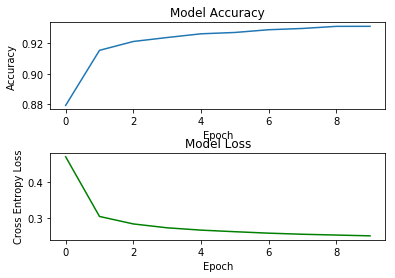

In [64]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

## Evaluating Model

Finally, we can evaluate our model on the test data by using the method `.evaluate()`:

In [65]:
score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.26236837894022463)
('Test accuracy:', 0.9283)


## Training A Simple Multi-layer Perceptron

Previously, we showed a simple network mapping directly from $784$ to $10$. Here we show how to combine different sequential layers. We now define a more complex model with two extra layers to see how that affects the final test accuracy.

In [66]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We have increased the number of parameters from 7850 to 79510 by adding this layer. Remember that the number of units given to the layer in Keras defines the dimensionality of the output space, that is why we need the last layer to have the same number of digit classes. 

In addition, we use ReLU (Rectified Linear Unit) activation function in the first dense layer. You can learn more about it [here](https://keras.io/activations/#relu).

As done above, we can train our new model and visualise the model curves:

Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2722 - acc: 0.9215
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1243 - acc: 0.9636
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0870 - acc: 0.9736
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0655 - acc: 0.9791
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0507 - acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0423 - acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0338 - acc: 0.9894
Epoch 8/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0279 - acc: 0.9913
Epoch 9/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0234 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0201 - acc: 0.9936

Text(0.5,0,'Epoch')

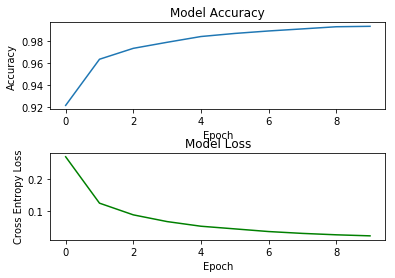

In [67]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

fig, axes = plt.subplots(2,1)
axes[0].plot(history2.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history2.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

We have now trained the two models and we can see how these extra layers improve the results in the test set.

In [68]:
print('Old model:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('New model:')
score2 = model2.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Old model:
('Test loss:', 0.26236837894022463)
('Test accuracy:', 0.9283)
New model:
('Test loss:', 0.08035141767178139)
('Test accuracy:', 0.9783)


We have improved accuracy results on test, however, there is still margin for parameter tuning. Try to improve upon this model by adding more layers and changing the dimensionality in each layer.

## Saving/Loading Model

Some networks will require long training times (hours, days or even weeks), it is essential to know how to save models for using them afterwards without the need of starting the training each time. 

We can save and load the trained model in different ways.

The first way is to save everyting into a single HDF5 file, which will contain:

*   the architecture of the model, allowing to re-create the model
*   the weights of the model
*   the training configuration (loss, optimiser)
*   the state of the optimiser, allowing to resume training exactly where you left off.

[Here](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) you can find more information about the process.


In [0]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# Load a compiled model identical to the previous one
model = load_model('my_model.h5') 

Another way is to save the architecture and the weights independently.




In [0]:
model.save_weights('my_model_weights.h5') # creates a HDF5 file 'my_model_weights.h5'

with open('my_model_architecture.json', 'w') as f:
    f.write(model.to_json()) # creates a json file 'my_model_architecture.json'

If we want to load the model, without having to define it, we can directly use `model_from_json()`.

In [0]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('my_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

If we have a model defined, we can then load the weights by using the method `load_weights(file_path)`.

In [0]:
model.load_weights('my_model_weights.h5')

If we modify the model and the new model shares some layers with the saved one, we could load the weights into a different architecture by using the layer name. This situation is common when you do fine-tuning or transfer-learning, among others.

In [0]:
model.load_weights('my_model_weights.h5', by_name=True)

## Obtaining an output of an intermediate layer

Sometimes we need to check how features of intermediate layers look like. This can be used for extracting features, but also for debugging purposes. That is why, we need to see how we can extract information of a trained architecture.

The easiest way is to define a new model that will have as final output the given output of an specific layer. We first define the model:

In [74]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,), name='first_dense'))
model.add(Dense(128, activation='relu', name='second_dense'))
model.add(Dense(10, activation='softmax', name='final_dense'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_dense (Dense)          (None, 64)                50240     
_________________________________________________________________
second_dense (Dense)         (None, 128)               8320      
_________________________________________________________________
final_dense (Dense)          (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


Now, we specify the name of the layer in which we are interested to obtain the output. In our example, it is the second dense layer.

In [75]:
from keras.models import Model

layer_name = 'second_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test_flatten)
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


Alternatively, we could build a Keras function that will return the output of a certain layer given a certain input, for example:

In [76]:
from keras import backend as K

get_second_dense_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])

intermediate_output = get_second_dense_layer_output([X_test_flatten])[0]
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

Second dense layer output shape: (10000, 10)
Final output shape: (10000, 10)


## Using a Callback Function

We mentioned callback functions in this tutorial already. We now will show an example of using one of the available callbacks, the `EarlyStopping` callback. The complete list of available callbacks can be found in the documentation [here](https://keras.io/callbacks/).

Controlling and managing callbacks is essential when training big models. Sometimes we want the network to train until it converges, but we are not able to determine the number of epochs it will take, therefore we need some mechanism to stop it. In those cases, the `EarlyStopping` callback is useful. Let's see how to stop the training when the validation loss is not decreasing anymore:

In [77]:
from keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping
# patience defines the number of epochs we wait before stopping training 
# when the monitored metric does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train_class, validation_split=0.2, 
            epochs=100, batch_size=32, callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 119us/step - loss: 0.2918 - acc: 0.9149 - val_loss: 0.1580 - val_acc: 0.9513
Epoch 2/100
48000/48000 [==============================] - 5s 107us/step - loss: 0.1279 - acc: 0.9615 - val_loss: 0.1230 - val_acc: 0.9621
Epoch 3/100
48000/48000 [==============================] - 5s 108us/step - loss: 0.0922 - acc: 0.9714 - val_loss: 0.1145 - val_acc: 0.9644
Epoch 4/100
48000/48000 [==============================] - 5s 109us/step - loss: 0.0704 - acc: 0.9778 - val_loss: 0.1068 - val_acc: 0.9703
Epoch 5/100
48000/48000 [==============================] - 5s 108us/step - loss: 0.0570 - acc: 0.9817 - val_loss: 0.1004 - val_acc: 0.9724
Epoch 6/100
48000/48000 [==============================] - 5s 107us/step - loss: 0.0482 - acc: 0.9848 - val_loss: 0.1092 - val_acc: 0.9718
Epoch 7/100
48000/48000 [==============================] - 5s 108us/step - loss: 0.0386 - acc: 0.9876 - val_loss: 0.

We can combine multiple callbacks when calling the fit module, learn more about it  [here](https://keras.io/callbacks/).

## Freezing Keras Layers

In some cases, we may want to fix the weights of some layers, meaning we exclude them from training. This is useful in the context of fine-tuning a model, or, for instance, when using fixed embeddings for text inputs. 

To do so, we can pass a trainable argument (Boolean) to a layer constructor to set a layer to be non-trainable:

In [0]:
frozen_layer = Dense(32, trainable=False)

Additionally, we can set the trainable property of a layer to `True` or `False` after initialization. For this to take effect, we will need to call `compile()` on our model after modifying the trainable property:

In [79]:
from keras.models import clone_model
 
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# We clone model in frozen_model
frozen_model = clone_model(model)
frozen_model.layers[0].trainable = False

# with this model the weights of the layer will be updated during training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
frozen_model.summary()

score_untrained = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen_untrained = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

# Uupdate the weights of `layer`
print('Train Models:/n')
model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

# Next operation will NOT update the weights of `layer`.
# (which will also affect the above model since it uses the same layer instance)
frozen_model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

print('Before Training: Trainable Model Test Accuracy:', score_untrained[1])
print('After Training:  Trainable Model Test Accuracy:', score[1])

print('Before Training: Frozen Model Test Accuracy:', score_frozen_untrained[1])
print('After Training:  Frozen Model Test Accuracy:', score_frozen[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 0
Non-trainable params: 7,850
_________________________________________________________________
Train Models:/n
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4699 - acc: 0.8766
Epoch 2/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3034 - acc: 0.9154
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.2833 - acc: 0.9211
Epoch 4/5
60000/60000 [

We can see in the model description that the frozen model has 0 trainable parameters, while it has 7,850 non-trainable parameters.

After training the network, the trainable model improves the accuracy while the frozen one does not change its accuracy.